In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [137]:
#importing dataset
wbcd = pd.read_csv("C:/Users/NIKSHITHA/Downloads/data.csv")
wbcd

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [138]:
wbcd.shape

(569, 33)

In [139]:
wbcd.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [140]:
wbcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [141]:
#removing column 0 id and 32 as it is unnamed
wbcd = wbcd.drop(["Unnamed: 32", "id"], axis = 1)

In [142]:
#replacing M and B with 1 and 0
wbcd.diagnosis.replace(["M", "B"], [1, 0], inplace = True)

In [143]:
wbcd.shape #features are reduced to 31, 30 features and 1 target variable

(569, 31)

In [144]:
#confirming zero missing values in the dataset
wbcd.isnull().values.any()

False

In [145]:
#confirming class distribution
wbcd.groupby(["diagnosis"]).diagnosis.count()

diagnosis
0    357
1    212
Name: diagnosis, dtype: int64

In [146]:
#checking correlation of the features in the dataset
wbcd.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

In [147]:
#ranking the features in relation to target variable diagnosis
corr = wbcd.corr()
corr.sort_values(["diagnosis"], ascending = False, inplace = True)
corr.diagnosis

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

<Axes: >

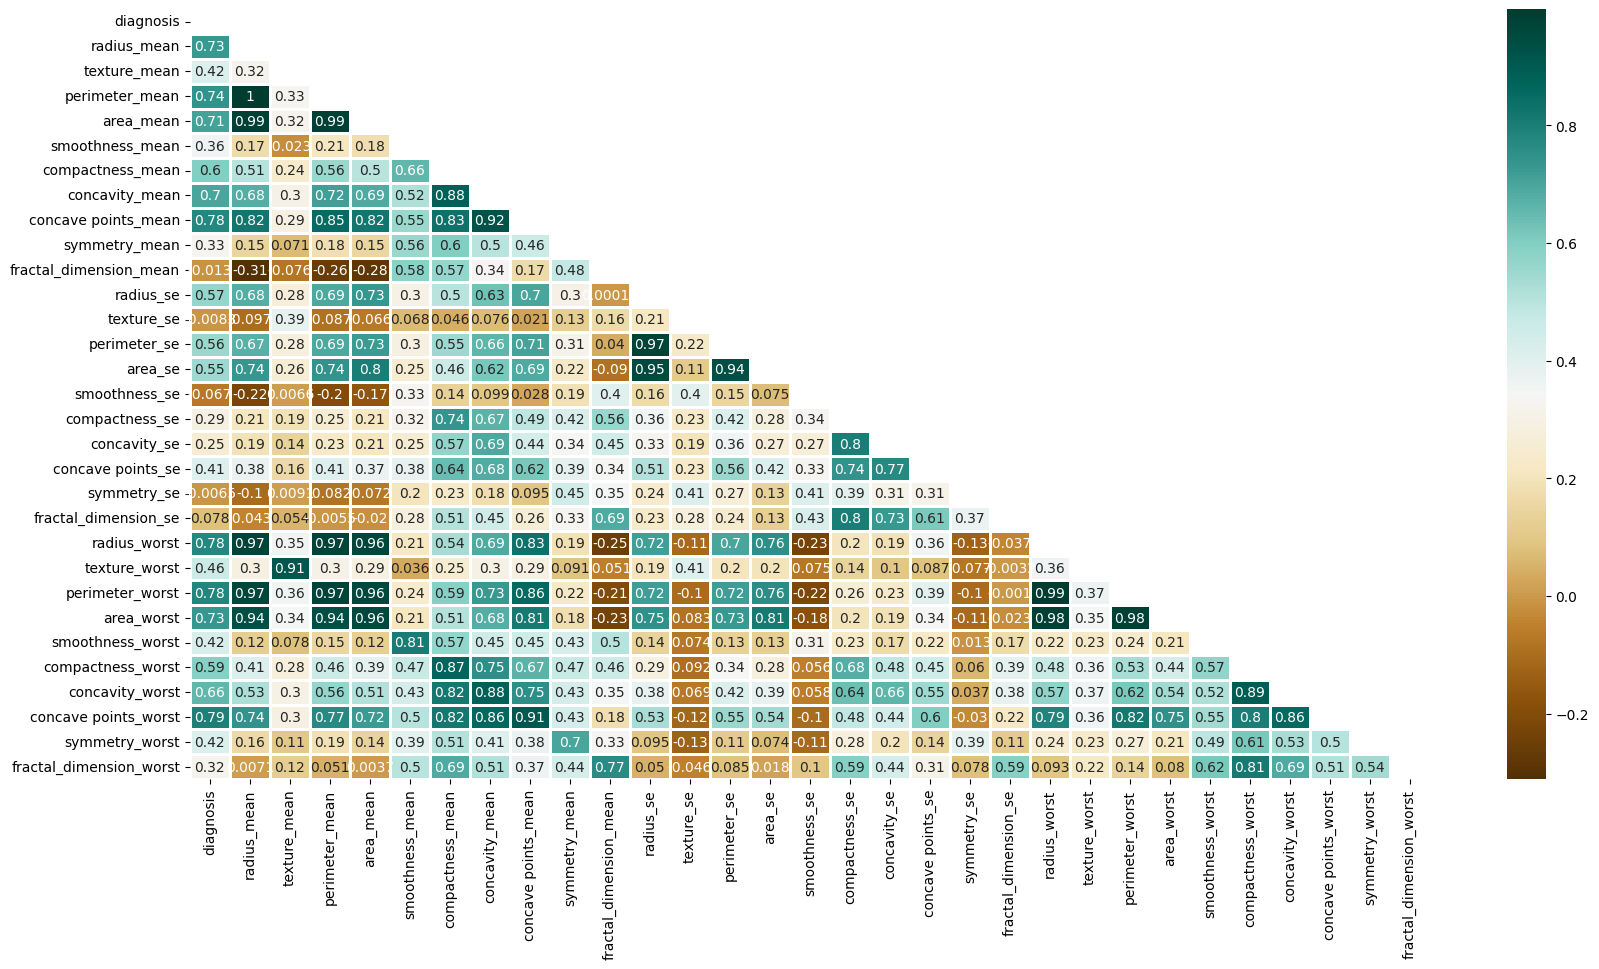

In [148]:
#vizualising correlation between features
plt.figure(figsize = (20, 10))
matrix = np.triu(wbcd.corr())
sb.heatmap(wbcd.corr(), annot = True, linewidth = 0.9, mask = matrix, cmap = "BrBG")

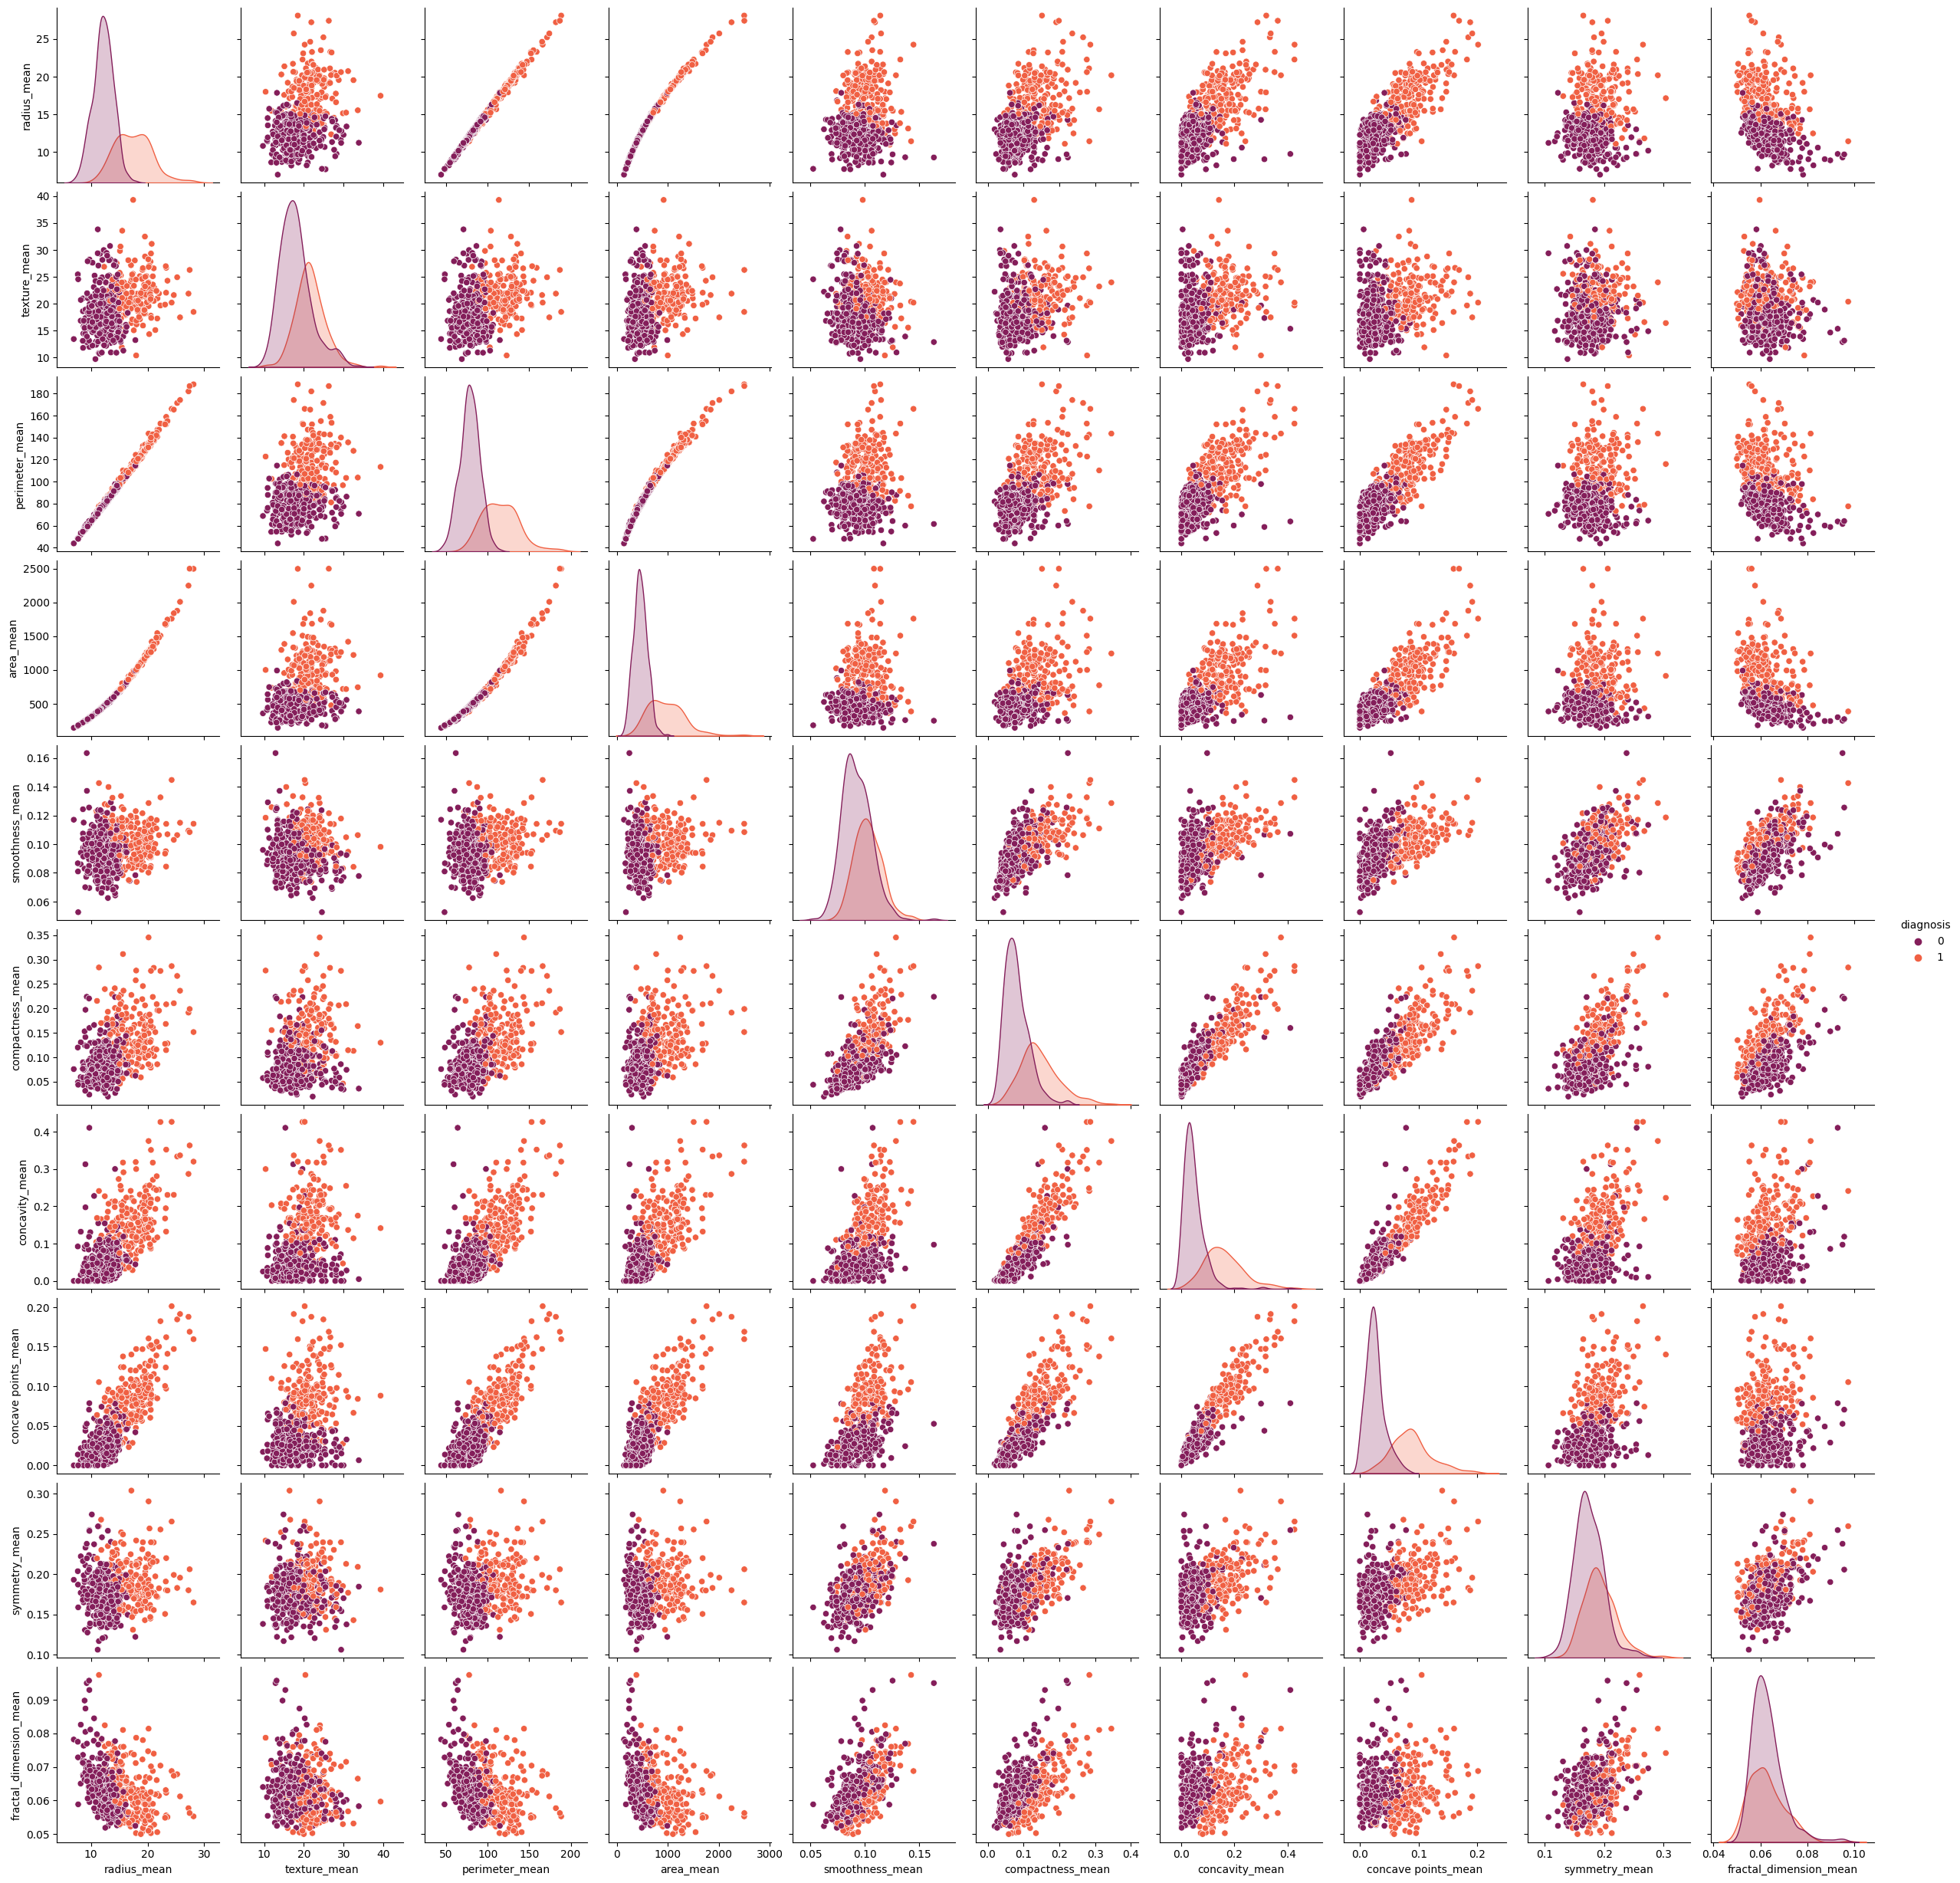

In [149]:
#visualizing the relation between the "mean" columns
cols = ["diagnosis",
        "radius_mean",
        "texture_mean",
        "perimeter_mean",
        "area_mean",
        "smoothness_mean",
        "compactness_mean",
        "concavity_mean",
        "concave points_mean",
        "symmetry_mean",
        "fractal_dimension_mean"]
sb.pairplot(data = wbcd[cols], hue = "diagnosis", palette = "rocket")

Encoding target variable

In [150]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wbcd["diagnosis"] = le.fit_transform(wbcd["diagnosis"])
wbcd["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [151]:
features = wbcd[["radius_mean", "texture_mean", "perimeter_mean","area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
       "concave points_mean", "symmetry_mean", "fractal_dimension_mean","radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se","compactness_se", "concavity_se", "concave points_se", "symmetry_se",
       "fractal_dimension_se", "radius_worst", "texture_worst","perimeter_worst", "area_worst", "smoothness_worst",
       "compactness_worst", "concavity_worst", "concave points_worst","symmetry_worst", "fractal_dimension_worst"]]
diagnosis = wbcd[["diagnosis"]]

In [152]:
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,
    diagnosis, test_size=0.30, random_state=42)

In [153]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #shape of each subset

((398, 30), (171, 30), (398, 1), (171, 1))

***Principal Component Analysis for Dimensionality Reduction***

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [155]:
#explained variance set to 95%
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train.shape, X_train_pca.shape #after PCA the features are reduced from 30 to 10

((398, 30), (398, 10))

In [156]:
pca_wbcd = pd.DataFrame(data = X_train_pca, columns = ["Principal Component 1", "Principal Component 2", "Principal Component 3", "Principal Component 4", "Principal Component 5", "Principal Component 6", "Principal Component 7", "Principal Component 8", "Principal Component 9", "Principal Component 10"])
pca_wbcd

Principal Component 1  Principal Component 2  Principal Component 3  \
0                -3.084842              -2.158704              -0.339875   
1                -2.182647              -0.617571               0.447208   
2                 2.049959               2.328953               1.169407   
3                -2.809267              -0.950791              -0.305102   
4                -1.913537              -1.072582               0.498365   
..                     ...                    ...                    ...   
393              -0.307514               7.375943               3.928696   
394              -0.686019               1.889553              -0.622723   
395              -4.553716              -3.144000              -0.021237   
396               0.720424               0.547831              -2.748877   
397              -3.419369              -1.339703              -0.007964   

     Principal Component 4  Principal Component 5  Principal Component 6  \
0                -0.216630               1.545359               0.258008   
1                -0.150818               2.860346              -0.353044   
2                -1.814647              -0.115599               0.280841   
3                -0.380816               0.547114               1.202716   
4                 1.311554              -0.204212               0.064969   
..                     ...                    ...                    ...   
393              -2.654496               2.060507              -1.338530   
394               0.650350              -1.027044              -1.513335   
395              -0.375321               1.382337               1.036213   
396               0.688838               0.083803              -1.115289   
397               1.884641              -0.015786               0.241195   

     Principal Component 7  Principal Component 8  Principal Component 9  \
0                 0.571077              -0.137962              -0.100367   
1                -0.098260               0.222224              -0.335081   
2                 0.211097              -0.176826              -0.740189   
3                -0.277676              -0.093055               0.380406   
4                -0.051336              -0.019707               0.153882   
..                     ...                    ...                    ...   
393               1.539317               1.770784              -0.993773   
394              -0.376029              -0.555040               0.160525   
395               0.097954               0.193509              -0.329394   
396               0.113228              -0.032772              -0.162154   
397              -0.102132              -0.664035               0.059324   

     Principal Component 10  
0                 -0.269436  
1                 -0.221412  
2                 -0.214450  
3                  0.372333  
4                 -0.166299  
..                      ...  
393                2.433026  
394               -0.255929  
395                0.439670  
396               -0.295888  
397                0.418840  

[398 rows x 10 columns]

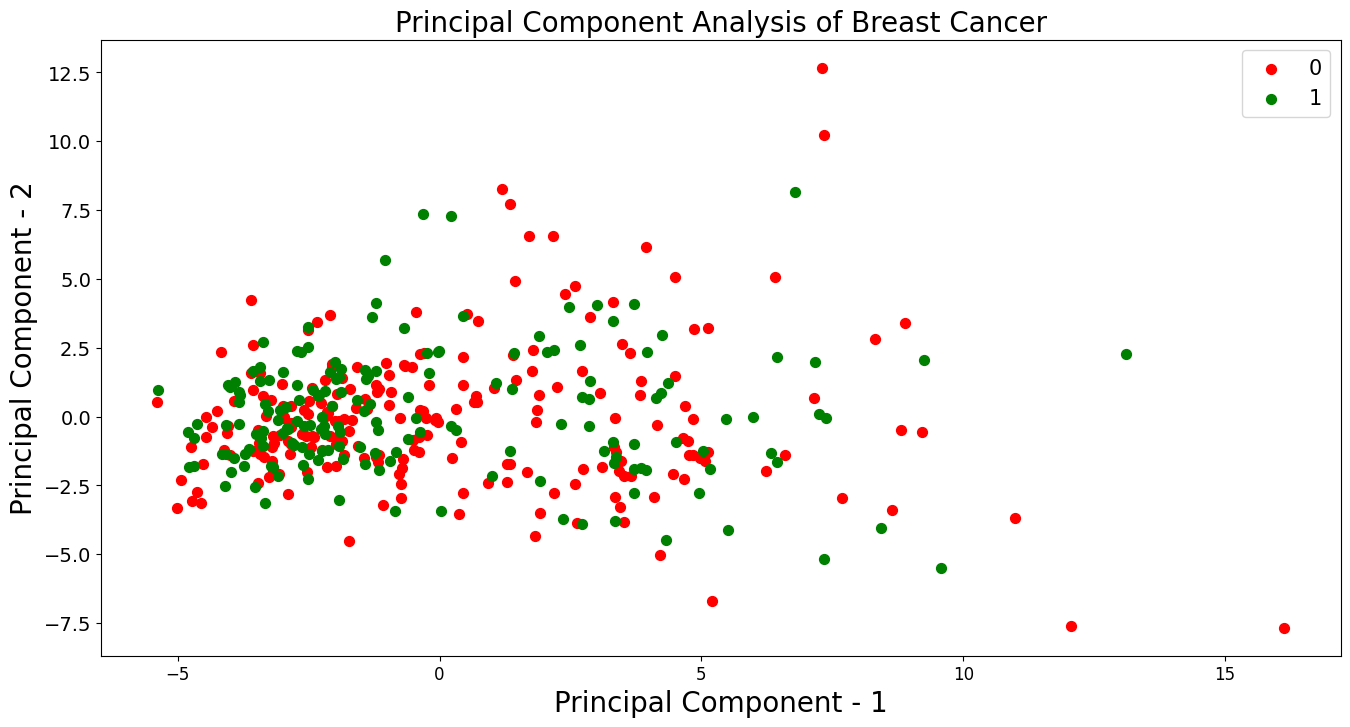

In [158]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = wbcd['diagnosis'] == target
    plt.scatter(pca_wbcd.loc[indicesToKeep, 'Principal Component 1']
               , pca_wbcd.loc[indicesToKeep, 'Principal Component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Correlation between the extracted features

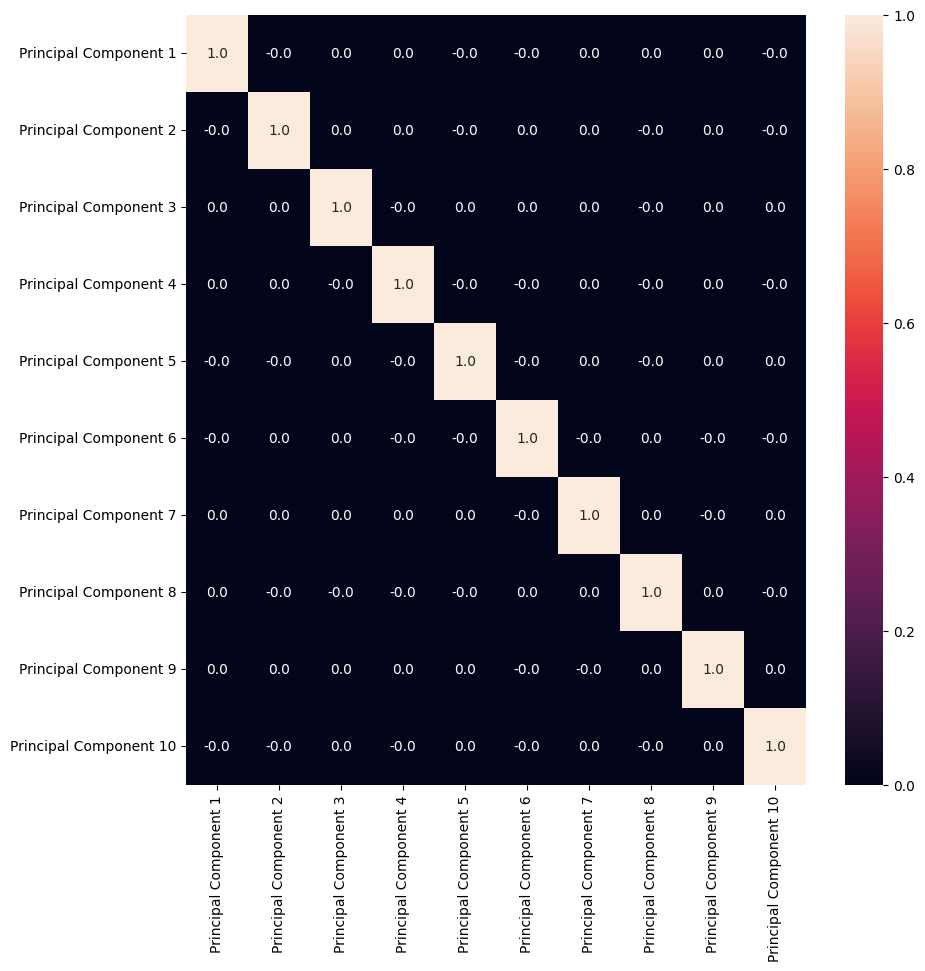

In [22]:
plt.figure(figsize = (10, 10))
sb.heatmap(pca_wbcd.corr(), annot= True, fmt = ".1f")
plt.show() #zero correlation

Standard scaling test data

In [23]:
X_test = scaler.transform(X_test)
X_test_pca = pca.transform(X_test) #transforming test data with pca
X_test_pca

array([[-0.75023059,  0.70051856, -0.67563154, ..., -0.26243251,
         0.43476247,  0.27314756],
       [ 2.66883345, -4.37302   ,  0.16849873, ..., -0.04167559,
         0.42308895, -0.20274679],
       [ 1.47390658, -0.99261854, -1.38708004, ..., -0.52701787,
         0.61066901,  0.09198632],
       ...,
       [ 1.27706019,  7.08888322,  4.40399842, ...,  0.9622227 ,
        -1.39716971,  0.39038338],
       [ 2.90028421,  3.4674802 , -0.91890914, ...,  0.04110485,
         0.07192097,  0.74898027],
       [ 1.08116084,  2.51994549, -1.49323444, ...,  0.77797191,
         0.10148147, -0.49909384]])

Standardizing training and test set

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[-0.48313229, -0.13285829, -0.46029654, ..., -0.19338258,
         0.21048039,  0.22648723],
       [ 1.34906186,  0.51103428,  1.29204314, ...,  1.01968394,
        -0.53341696, -1.00866239],
       [ 0.36358494,  0.0762286 ,  0.38928522, ...,  0.58868486,
        -0.07390369, -0.19132599],
       ...,
       [-1.20977993, -0.2611616 , -1.1400444 , ..., -0.23099704,
        -0.4321955 ,  1.86687566],
       [-0.10083521,  1.26659826,  0.00303674, ...,  0.59965574,
         1.23394176,  1.98690408],
       [-0.36419542, -1.19967661, -0.30118031, ...,  0.66234652,
        -0.39202826,  1.95832589]])

***Model training and evaluation***

**1. Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_pca, y_train.values.ravel())

y_pred_lr = lr.predict(X_test_pca)
print("Intercept", lr.intercept_)
print("Coefficients", lr.coef_)

Intercept [-0.65155659]
Coefficients [[ 2.25200255 -1.25177867 -0.60843002  0.72821573 -0.80883855 -0.30386597
   0.08046909  0.20425738  1.04156108  0.13640646]]


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

acc_lr = accuracy_score (y_test, y_pred_lr)
print("Accuracy Score", acc_lr)
pre_lr = precision_score (y_test, y_pred_lr)
print("Precision Score", pre_lr)
rec_lr = recall_score (y_test, y_pred_lr)
print("Recall Score", rec_lr)
f1_lr = f1_score (y_test, y_pred_lr)
print("F1 Score", f1_lr)
cm_lr = confusion_matrix (y_test, y_pred_lr)
print("Confusion Matrix", cm_lr)
spe_lr = cm_lr[1,1]/(cm_lr[1,0]+cm_lr[1,1])
print('Specificity : ', spe_lr)

Accuracy Score 0.9941520467836257
Precision Score 1.0
Recall Score 0.9841269841269841
F1 Score 0.9919999999999999
Confusion Matrix [[108   0]
 [  1  62]]
Specificity :  0.9841269841269841


In [27]:
#printing normalized confusion matrix
def predict_and_plot(inputs, targets, name=""):
    preds = lr.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize="true")
    plt.figure()
    sb.heatmap(cf, annot = True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 97.99%


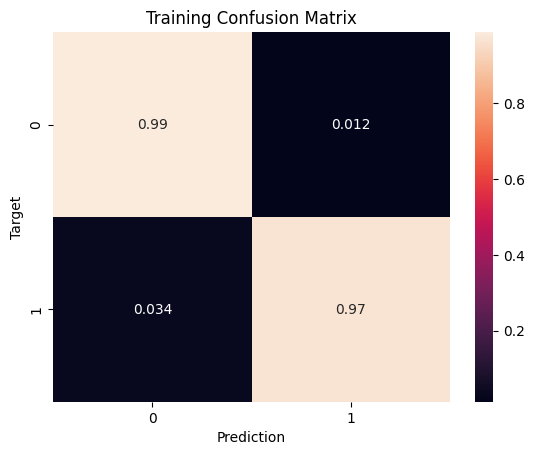

In [28]:
train_preds_lr = predict_and_plot(X_train_pca, y_train, "Training")

Accuracy: 99.42%


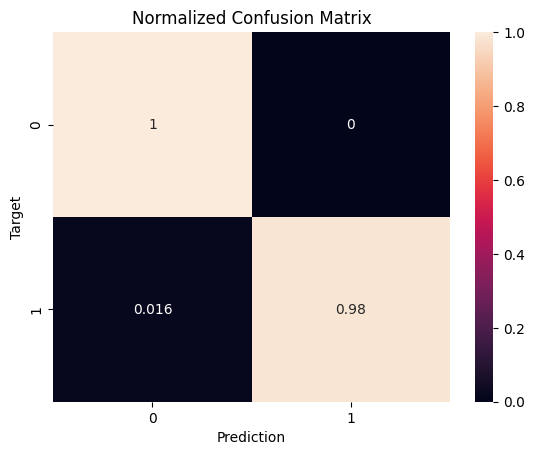

In [29]:
test_preds_lr = predict_and_plot(X_test_pca, y_test, "Normalized")

In [30]:
#printing confusion matrix without normalization
def predict_and_plot(inputs, targets, name=""):
    preds = lr.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds)
    plt.figure()
    sb.heatmap(cf, annot = True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 97.99%


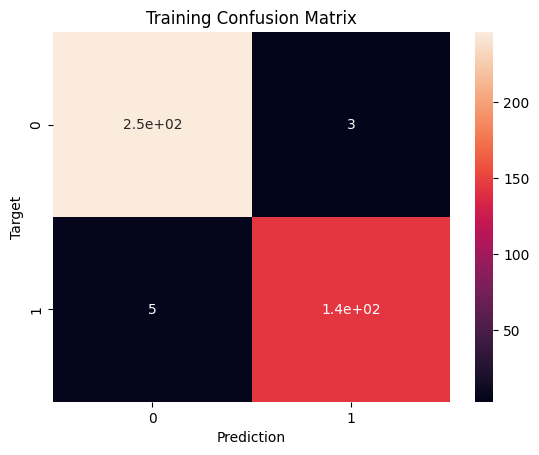

In [31]:
train_preds2_lr = predict_and_plot(X_train_pca, y_train, "Training")

Accuracy: 99.42%


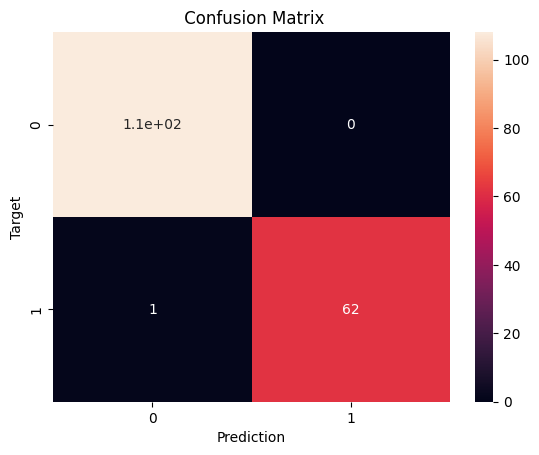

In [32]:
test_preds2_lr = predict_and_plot(X_test_pca, y_test)

Stratified 10-fold cross-validation

In [33]:
from sklearn.model_selection import StratifiedKFold
#stratified kfold

X1 = pd.DataFrame(features)
y1 = pd.DataFrame(diagnosis)

acc_lr_skf = []
pre_lr_skf = []
rec_lr_skf = []
f1_lr_skf = []
cm_lr_skf = []

skf = StratifiedKFold(n_splits = 10, random_state = None) #10 fold
skf.get_n_splits(X1, y1)
for train_index, test_index in skf.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    #apply PCA
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    pca = PCA(n_components = 10)
    pca.fit(X1_train)
    X1_train = pca.transform(X1_train)

    X1_test = scaler.transform(X1_test)
    X1_test = pca.transform(X1_test)

    lr.fit(X1_train, y1_train.values.ravel())
    ylr_pred = lr.predict(X1_test)
    acc_lr_skf.append(accuracy_score(ylr_pred, y1_test))
    pre_lr_skf.append(precision_score(ylr_pred, y1_test))
    rec_lr_skf.append(recall_score(ylr_pred, y1_test))
    f1_lr_skf.append(f1_score(ylr_pred, y1_test))
    cm_lr_skf.append(confusion_matrix(ylr_pred, y1_test))


print("Accuracy Score", np.array(acc_lr_skf).mean())
print("Precision Score", np.array(pre_lr_skf).mean())
print("Recall Score", np.array(rec_lr_skf).mean())
print("F1 Score", np.array(f1_lr_skf).mean())

Accuracy Score 0.9806390977443608
Precision Score 0.9668831168831169
Recall Score 0.9815424430641821
F1 Score 0.9736109617363164


In [34]:
#for score comparison between the models
acc1_lr = np.array(acc_lr_skf).mean()
print(acc1_lr)
pre1_lr = np.array(pre_lr_skf).mean()
print(pre_lr)
rec1_lr = np.array(rec_lr_skf).mean()
print(rec_lr)
f11_lr = np.array(f1_lr_skf).mean()
print(f1_lr)

0.9806390977443608
1.0
0.9841269841269841
0.9919999999999999


***2. Support Vector Machine***

In [35]:
from sklearn.svm import SVC
svm = SVC().fit(X_train_pca, y_train.values.ravel())

y_pred_svm = svm.predict(X_test_pca)
print("Intercept", svm.intercept_)


Intercept [0.34177348]


In [36]:
acc_svm = accuracy_score (y_test, y_pred_svm)
print("Accuracy Score", acc_svm)
pre_svm = precision_score (y_test, y_pred_svm)
print("Precision Score", pre_svm)
rec_svm = recall_score (y_test, y_pred_svm)
print("Recall Score", rec_svm)
f1_svm = f1_score (y_test, y_pred_svm)
print("F1 Score", f1_svm)
cm_svm = confusion_matrix (y_test, y_pred_svm)
print("Confusion Matrix", cm_svm)
spe_svm = cm_svm[1,1]/(cm_svm[1,0]+cm_svm[1,1])
print('Specificity : ', spe_svm)

Accuracy Score 0.9766081871345029
Precision Score 0.9682539682539683
Recall Score 0.9682539682539683
F1 Score 0.9682539682539683
Confusion Matrix [[106   2]
 [  2  61]]
Specificity :  0.9682539682539683


In [37]:
#Printing normalized confusion matrix
def predict_and_plot(inputs, targets, name=""):
    preds_svm = svm.predict(inputs)

    accuracy = accuracy_score(targets, preds_svm)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds_svm, normalize="true")
    plt.figure()
    sb.heatmap(cf, annot = True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title('{} Confusion Matrix'.format(name));

    return preds_svm

Accuracy: 97.99%


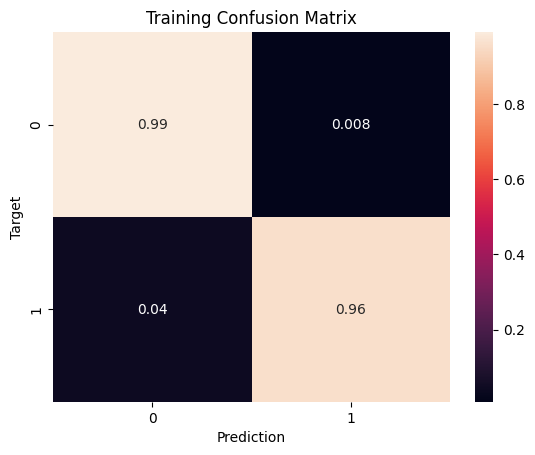

In [38]:
train_preds_svm = predict_and_plot(X_train_pca, y_train, "Training")

Accuracy: 97.66%


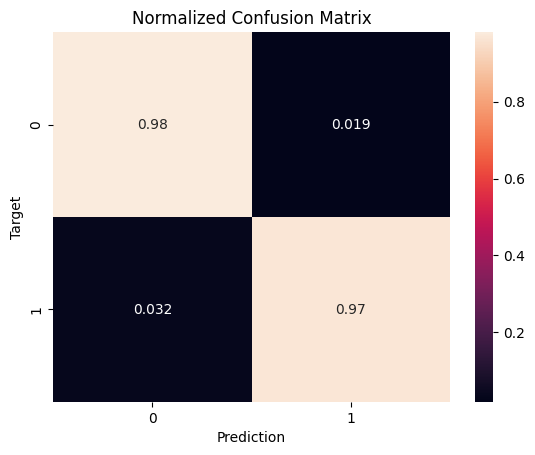

In [39]:
test_preds2_svm = predict_and_plot(X_test_pca, y_test, "Normalized")

In [40]:
#printing confusion matrix without normalization
def predict_and_plot(inputs, targets, name=""):
    preds_svm = svm.predict(inputs)

    accuracy = accuracy_score(targets, preds_svm)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds_svm)
    plt.figure()
    sb.heatmap(cf, annot = True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title('{} Confusion Matrix'.format(name));

    return preds_svm

Accuracy: 97.99%


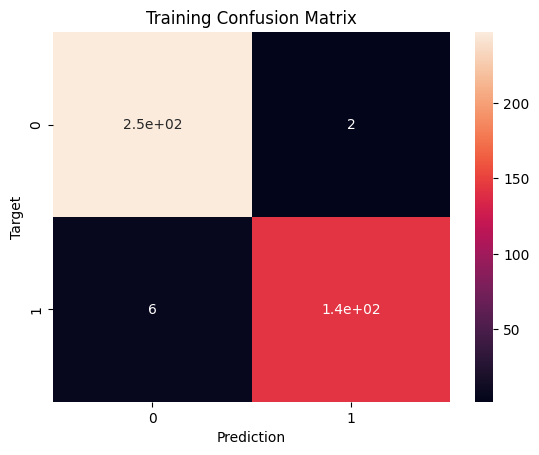

In [41]:
train_preds_svm2 = predict_and_plot(X_train_pca, y_train, "Training")

Accuracy: 97.66%


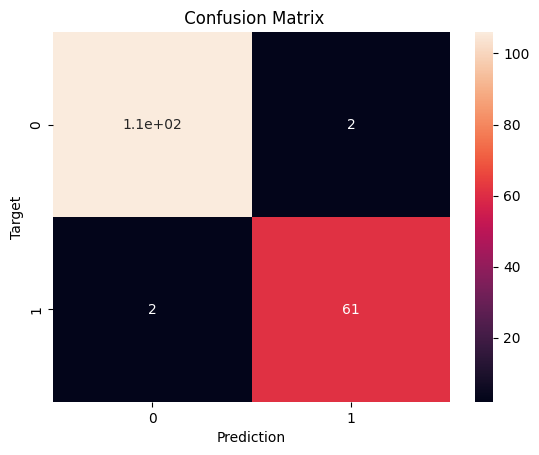

In [42]:
test_preds2_svm2 = predict_and_plot(X_test_pca, y_test)

Stratified 10-fold cross-validation

In [43]:
from sklearn.model_selection import StratifiedKFold
acc_svm_skf = []
pre_svm_skf = []
rec_svm_skf = []
f1_svm_skf = []
cm_svm_skf = []

skf = StratifiedKFold(n_splits = 10, random_state = None)
skf.get_n_splits(X1, y1)
for train_index, test_index in skf.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]


    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    pca = PCA(n_components = 10)
    pca.fit(X1_train)
    X1_train = pca.transform(X1_train)

    X1_test = scaler.transform(X1_test)
    X1_test = pca.transform(X1_test)

    svm.fit(X1_train, y1_train.values.ravel())
    ysvm_pred = svm.predict(X1_test)
    acc_svm_skf.append(accuracy_score(ysvm_pred, y1_test))
    pre_svm_skf.append(precision_score(ysvm_pred, y1_test))
    rec_svm_skf.append(recall_score(ysvm_pred, y1_test))
    f1_svm_skf.append(f1_score(ysvm_pred, y1_test))
    cm_svm_skf.append(confusion_matrix(ysvm_pred, y1_test))




print("Accuracy Score", np.array(acc_svm_skf).mean())
print("Precision Score", np.array(pre_svm_skf).mean())
print("Recall Score", np.array(rec_svm_skf).mean())
print("F1 Score", np.array(f1_svm_skf).mean())

Accuracy Score 0.9770989974937342
Precision Score 0.9621212121212122
Recall Score 0.9770158102766798
F1 Score 0.9688071737929933


In [44]:
#for score comparison between the models
acc1_svm = np.array(acc_svm_skf).mean()
print(acc1_svm)
pre1_svm = np.array(pre_svm_skf).mean()
print(pre_svm)
rec1_svm = np.array(rec_svm_skf).mean()
print(rec_svm)
f11_svm = np.array(f1_svm_skf).mean()
print(f1_svm)

0.9770989974937342
0.9682539682539683
0.9682539682539683
0.9682539682539683


***3. Naive Bayes***

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train_pca, y_train.values.ravel())

y_pred_nb = nb.predict(X_test_pca)

In [46]:
acc_nb = accuracy_score (y_test, y_pred_nb)
print("Accuracy Score", acc_nb)
pre_nb = precision_score (y_test, y_pred_nb)
print("Precision Score", pre_nb)
rec_nb = recall_score (y_test, y_pred_nb)
print("Recall Score", rec_nb)
f1_nb = f1_score (y_test, y_pred_nb)
print("F1 Score", f1_nb)
cm_nb = confusion_matrix (y_test, y_pred_nb)
print("Confusion Matrix", cm_nb)
spe_nb = cm_nb[1,1]/(cm_nb[1,0]+cm_nb[1,1])
print('Specificity : ', spe_nb)

Accuracy Score 0.9064327485380117
Precision Score 0.8983050847457628
Recall Score 0.8412698412698413
F1 Score 0.8688524590163935
Confusion Matrix [[102   6]
 [ 10  53]]
Specificity :  0.8412698412698413


In [47]:
#Printing normalized confusion matrix
def predict_and_plot(inputs, targets, name=""):
    preds_nb = nb.predict(inputs)

    accuracy = accuracy_score(targets, preds_nb)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds_nb, normalize="true")
    plt.figure()
    sb.heatmap(cf, annot = True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title('{} Confusion Matrix'.format(name));

    return preds_nb

Accuracy: 91.96%


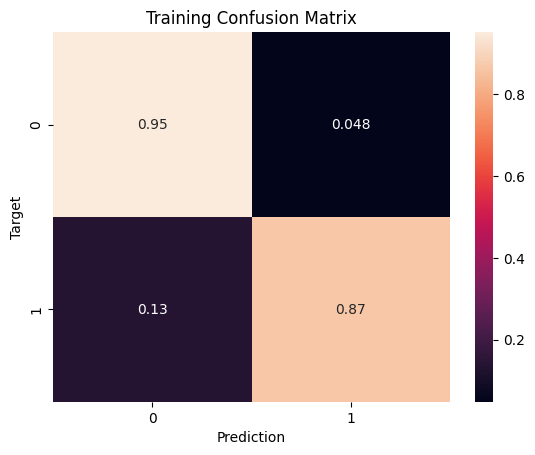

In [48]:
train_preds_nb = predict_and_plot(X_train_pca, y_train, "Training")

Accuracy: 90.64%


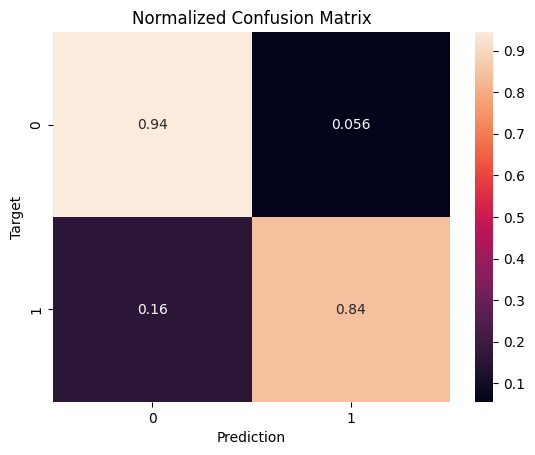

In [49]:
test_preds2_nb = predict_and_plot(X_test_pca, y_test, "Normalized")

In [50]:
#printing confusion matrix without normalization
def predict_and_plot(inputs, targets, name=""):
    preds_nb = nb.predict(inputs)

    accuracy = accuracy_score(targets, preds_nb)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds_nb)
    plt.figure()
    sb.heatmap(cf, annot = True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title('{} Confusion Matrix'.format(name));

    return preds_nb

Accuracy: 91.96%


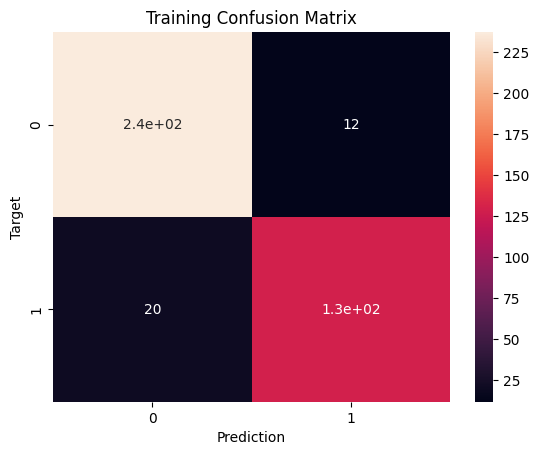

In [51]:
train_preds_nb2 = predict_and_plot(X_train_pca, y_train, "Training")

Accuracy: 90.64%


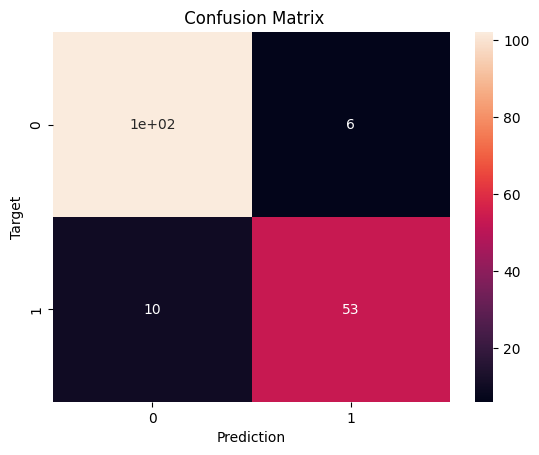

In [52]:
test_preds2_nb2 = predict_and_plot(X_test_pca, y_test)

Stratified 10-fold cross-validation

In [53]:
from sklearn.model_selection import StratifiedKFold
acc_nb_skf = []
pre_nb_skf = []
rec_nb_skf = []
f1_nb_skf = []
cm_nb_skf = []

skf = StratifiedKFold(n_splits = 10, random_state = None) #10 fold
skf.get_n_splits(X1, y1)
for train_index, test_index in skf.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]


    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    pca = PCA(n_components = 10)
    pca.fit(X1_train)
    X1_train = pca.transform(X1_train)

    X1_test = scaler.transform(X1_test)
    X1_test = pca.transform(X1_test)

    nb.fit(X1_train, y1_train.values.ravel())
    ynb_pred = nb.predict(X1_test)
    acc_nb_skf.append(accuracy_score(ynb_pred, y1_test))
    pre_nb_skf.append(precision_score(ynb_pred, y1_test))
    rec_nb_skf.append(recall_score(ynb_pred, y1_test))
    f1_nb_skf.append(f1_score(ynb_pred, y1_test))
    cm_nb_skf.append(confusion_matrix(ynb_pred, y1_test))




print("Accuracy Score", np.array(acc_nb_skf).mean())
print("Precision Score", np.array(pre_nb_skf).mean())
print("Recall Score", np.array(rec_nb_skf).mean())
print("F1 Score", np.array(f1_nb_skf).mean())

Accuracy Score 0.9174498746867167
Precision Score 0.862987012987013
Recall Score 0.913964348793397
F1 Score 0.8859441365837462


In [54]:
#for score comparison between the models
acc1_nb = np.array(acc_nb_skf).mean()
print(acc1_nb)
pre1_nb = np.array(pre_nb_skf).mean()
print(pre_nb)
rec1_nb = np.array(rec_nb_skf).mean()
print(rec_nb)
f11_nb = np.array(f1_nb_skf).mean()
print(f1_nb)

0.9174498746867167
0.8983050847457628
0.8412698412698413
0.8688524590163935


***4. Decision Tree***

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini").fit(X_train_pca, y_train.values.ravel())

y_pred_dt = dt.predict(X_test_pca)

In [56]:
acc_dt = accuracy_score (y_test, y_pred_dt)
print("Accuracy Score", acc_dt)
pre_dt = precision_score (y_test, y_pred_dt)
print("Precision Score", pre_dt)
rec_dt = recall_score (y_test, y_pred_dt)
print("Recall Score", rec_dt)
f1_dt = f1_score (y_test, y_pred_dt)
print("F1 Score", f1_dt)
cm_dt = confusion_matrix (y_test, y_pred_dt)
print("Confusion Matrix", cm_dt)
spe_dt = cm_dt[1,1]/(cm_dt[1,0]+cm_dt[1,1])
print('Specificity : ', spe_dt)

Accuracy Score 0.9181286549707602
Precision Score 0.8656716417910447
Recall Score 0.9206349206349206
F1 Score 0.8923076923076922
Confusion Matrix [[99  9]
 [ 5 58]]
Specificity :  0.9206349206349206


In [57]:
#Printing normalized confusion matrix
def predict_and_plot(inputs, targets, name=""):
    preds_dt = dt.predict(inputs)

    accuracy = accuracy_score(targets, preds_dt)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds_dt, normalize="true")
    plt.figure()
    sb.heatmap(cf, annot = True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title('{} Confusion Matrix'.format(name));

    return preds_dt

Accuracy: 100.00%


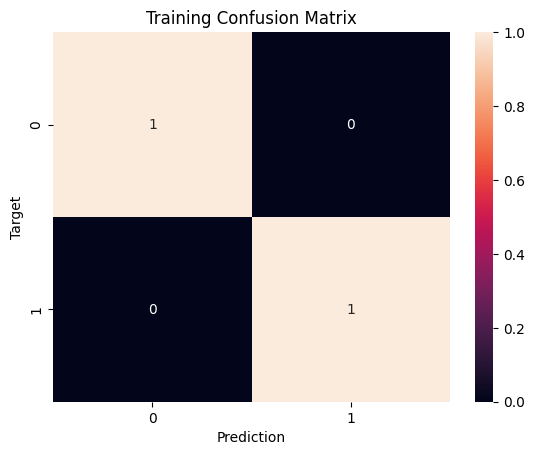

In [58]:
train_preds_dt = predict_and_plot(X_train_pca, y_train, "Training")

Accuracy: 91.81%


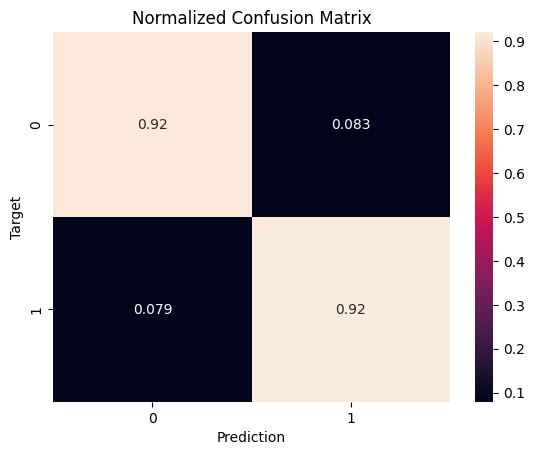

In [59]:
test_preds2_dt = predict_and_plot(X_test_pca, y_test, "Normalized")

In [60]:
#printing confusion matrix without normalization
def predict_and_plot(inputs, targets, name=""):
    preds_dt = dt.predict(inputs)

    accuracy = accuracy_score(targets, preds_dt)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds_dt)
    plt.figure()
    sb.heatmap(cf, annot = True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title('{} Confusion Matrix'.format(name));

    return preds_dt

Accuracy: 100.00%


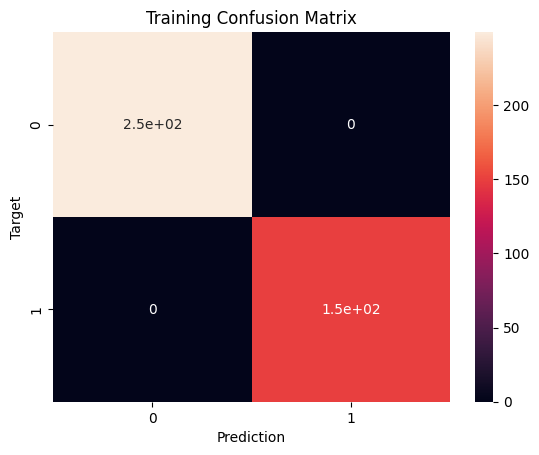

In [61]:
train_preds_dt2 = predict_and_plot(X_train_pca, y_train, "Training")

Accuracy: 91.81%


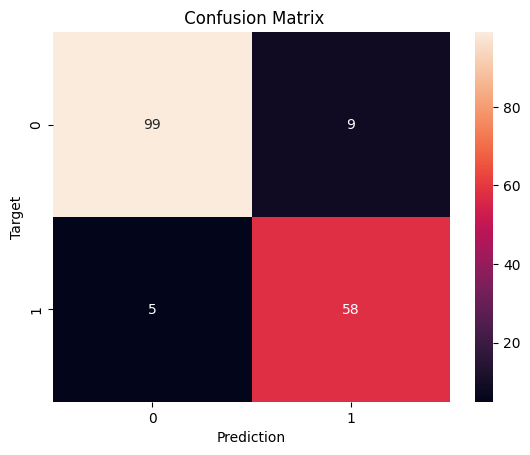

In [62]:
test_preds2_dt2 = predict_and_plot(X_test_pca, y_test)

Stratified 10-fold cross-validation

In [63]:
from sklearn.model_selection import StratifiedKFold
acc_dt_skf = []
pre_dt_skf = []
rec_dt_skf = []
f1_dt_skf = []
cm_dt_skf = []

skf = StratifiedKFold(n_splits = 10, random_state = None)
skf.get_n_splits(X1, y1)
for train_index, test_index in skf.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]


    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    pca = PCA(n_components = 10)
    pca.fit(X1_train)
    X1_train = pca.transform(X1_train)

    X1_test = scaler.transform(X1_test)
    X1_test = pca.transform(X1_test)

    dt.fit(X1_train, y1_train.values.ravel())
    ydt_pred = dt.predict(X1_test)
    acc_dt_skf.append(accuracy_score(ydt_pred, y1_test))
    pre_dt_skf.append(precision_score(ydt_pred, y1_test))
    rec_dt_skf.append(recall_score(ydt_pred, y1_test))
    f1_dt_skf.append(f1_score(ydt_pred, y1_test))
    cm_dt_skf.append(confusion_matrix(ydt_pred, y1_test))




print("Accuracy Score", np.array(acc_dt_skf).mean())
print("Precision Score", np.array(pre_dt_skf).mean())
print("Recall Score", np.array(rec_dt_skf).mean())
print("F1 Score", np.array(f1_dt_skf).mean())

Accuracy Score 0.9315162907268171
Precision Score 0.9151515151515153
Recall Score 0.905070839153219
F1 Score 0.9082139057685454


In [64]:
#for score comparison between the models
acc1_dt = np.array(acc_dt_skf).mean()
print(acc1_dt)
pre1_dt = np.array(pre_dt_skf).mean()
print(pre_dt)
rec1_dt = np.array(rec_dt_skf).mean()
print(rec_dt)
f11_dt = np.array(f1_dt_skf).mean()
print(f1_dt)

0.9315162907268171
0.8656716417910447
0.9206349206349206
0.8923076923076922


***Random Forest***

Text(0, 0.5, 'Testing Accuracy')

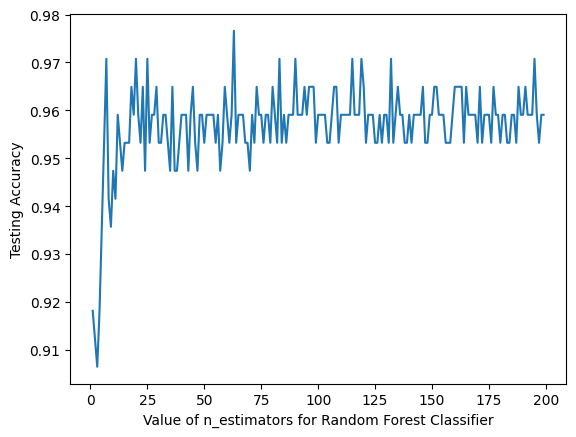

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 200):
    rf = RandomForestClassifier(n_estimators=k)
    rf.fit(X_train_pca, y_train.values.ravel())
    y_pred = rf.predict(X_test_pca)
    scores.append(accuracy_score(y_test, y_pred))

#finding number of trees for the classifier
import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy') #from https://stackoverflow.com/questions/60768008/how-to-choose-n-estimators-in-randomforestclassifier


In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1, n_estimators = 100, criterion = "entropy").fit(X_train_pca, y_train.values.ravel()) #Setting n to 100

y_pred_rf = rf.predict(X_test_pca)

In [67]:
acc_rf = accuracy_score (y_test, y_pred_rf)
print("Accuracy Score", acc_rf)
pre_rf = precision_score (y_test, y_pred_rf)
print("Precision Score", pre_rf)
rec_rf = recall_score (y_test, y_pred_rf)
print("Recall Score", rec_rf)
f1_rf = f1_score (y_test, y_pred_rf)
print("F1 Score", f1_rf)
cm_rf = confusion_matrix (y_test, y_pred_rf)
print("Confusion Matrix", cm_rf)
spe_rf = cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])
print("Specificity : ", spe_rf)

Accuracy Score 0.9590643274853801
Precision Score 0.9375
Recall Score 0.9523809523809523
F1 Score 0.9448818897637795
Confusion Matrix [[104   4]
 [  3  60]]
Specificity :  0.9523809523809523


Stratified 10-fold cross-validation

In [68]:
from sklearn.model_selection import StratifiedKFold
acc_rf_skf = []
pre_rf_skf = []
rec_rf_skf = []
f1_rf_skf = []
cm_rf_skf = []

skf = StratifiedKFold(n_splits = 10, random_state = None)
skf.get_n_splits(X1, y1)
for train_index, test_index in skf.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]


    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    pca = PCA(n_components = 10)
    pca.fit(X1_train)
    X1_train = pca.transform(X1_train)

    X1_test = scaler.transform(X1_test)
    X1_test = pca.transform(X1_test)

    rf.fit(X1_train, y1_train.values.ravel())
    yrf_pred = rf.predict(X1_test)
    acc_rf_skf.append(accuracy_score(yrf_pred, y1_test))
    pre_rf_skf.append(precision_score(yrf_pred, y1_test))
    rec_rf_skf.append(recall_score(yrf_pred, y1_test))
    f1_rf_skf.append(f1_score(yrf_pred, y1_test))
    cm_rf_skf.append(confusion_matrix(yrf_pred, y1_test))




print("Accuracy Score", np.array(acc_rf_skf).mean())
print("Precision Score", np.array(pre_rf_skf).mean())
print("Recall Score", np.array(rec_rf_skf).mean())
print("F1 Score", np.array(f1_rf_skf).mean())

Accuracy Score 0.9543233082706767
Precision Score 0.9244588744588744
Recall Score 0.9543602187286396
F1 Score 0.9378423676828838


In [69]:
#for score comparison between the models
acc1_rf = np.array(acc_rf_skf).mean()
print(acc1_rf)
pre1_rf = np.array(pre_rf_skf).mean()
print(pre_rf)
rec1_rf = np.array(rec_rf_skf).mean()
print(rec_rf)
f11_rf = np.array(f1_rf_skf).mean()
print(f1_rf)

0.9543233082706767
0.9375
0.9523809523809523
0.9448818897637795


***Models Performance***

Accuracy

In [70]:
models_acc = pd.DataFrame({ "Classifier" : ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "Decision Tree", "Random Forest"],
                       "Score" : [acc1_lr*100, acc1_svm*100, acc1_nb*100, acc1_dt*100, acc1_rf*100]})
models_acc.sort_values(by = "Score", ascending = False)

Classifier      Score
0     Logistic Regression  98.063910
1  Support Vector Machine  97.709900
4           Random Forest  95.432331
3           Decision Tree  93.151629
2             Naive Bayes  91.744987

Recall

In [71]:
models_rec = pd.DataFrame({ "Classifier" : ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "Decision Tree", "Random Forest"],
                       "Score" : [rec1_lr*100, rec1_svm*100, rec1_nb*100, rec1_dt*100, rec1_rf*100]})
models_rec.sort_values(by = "Score", ascending = False)

Classifier      Score
0     Logistic Regression  98.154244
1  Support Vector Machine  97.701581
4           Random Forest  95.436022
2             Naive Bayes  91.396435
3           Decision Tree  90.507084

Specificity

In [72]:
models_rec = pd.DataFrame({ "Classifier" : ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "Decision Tree", "Random Forest"],
                       "Score" : [spe_lr*100, spe_svm*100, spe_nb*100, spe_dt*100, spe_rf*100]})
models_rec.sort_values(by = "Score", ascending = False)

Classifier      Score
0     Logistic Regression  98.412698
1  Support Vector Machine  96.825397
4           Random Forest  95.238095
3           Decision Tree  92.063492
2             Naive Bayes  84.126984

Precision

In [73]:
models_pre = pd.DataFrame({ "Classifier" : ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "Decision Tree", "Random Forest"],
                       "Score" : [pre1_lr*100, pre1_svm*100, pre1_nb*100, pre1_dt*100, pre1_rf*100]})
models_pre.sort_values(by = "Score", ascending = False)

Classifier      Score
0     Logistic Regression  96.688312
1  Support Vector Machine  96.212121
4           Random Forest  92.445887
3           Decision Tree  91.515152
2             Naive Bayes  86.298701

F1 Score

In [74]:
models_f1 = pd.DataFrame({ "Classifier" : ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "Decision Tree", "Random Forest"],
                       "Score" : [f11_lr*100, f11_svm*100, f11_nb*100, f11_dt*100, f11_rf*100]})
models_f1.sort_values(by = "Score", ascending = False)

Classifier      Score
0     Logistic Regression  97.361096
1  Support Vector Machine  96.880717
4           Random Forest  93.784237
3           Decision Tree  90.821391
2             Naive Bayes  88.594414

# *Feature Selection*

# Univariate feature selection

In [75]:
features2 = features
diagnosis2 = diagnosis

In [76]:
from sklearn.preprocessing import MinMaxScaler
features2 = MinMaxScaler().fit_transform(features2) #normalizing features
features2

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [77]:
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2,
    diagnosis2, test_size=0.30, random_state=42)

In [78]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape #shape of each subset

((398, 30), (171, 30), (398, 1), (171, 1))

In [79]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#generating three different top scoring features for comparison
#20 highest scoring features
features_20 = SelectKBest(chi2, k = 20).fit(X_train2, y_train2.values.ravel())

#10 highest scoring features
features_10 = SelectKBest(chi2, k = 10).fit(X_train2, y_train2.values.ravel())

#5 highest scoring features
features_5 = SelectKBest(chi2, k = 5).fit(X_train2, y_train2.values.ravel())


Logistic Regression

In [80]:
#evaluating the top 20, 10 and 5 highest scoring features by accuracy

#Accuracy 20 highest scoring features
X_train_3 = features_20.transform(X_train2)
X_test_3 = features_20.transform(X_test2)
clf_lr_2 = LogisticRegression()
clf_lr_2_2 = LogisticRegression().fit(X_train_3, y_train2.values.ravel())
ac_lr_2 = accuracy_score(y_test2, clf_lr_2_2.predict(X_test_3))

#Accuracy 10 highest scoring features
X_train_4 = features_10.transform(X_train2)
X_test_4 = features_10.transform(X_test2)
clf_lr_3 = LogisticRegression()
clf_lr_3_3 = LogisticRegression().fit(X_train_4, y_train2.values.ravel())
ac_lr_3 = accuracy_score(y_test2, clf_lr_3_3.predict(X_test_4))

#Accuracy 5 highest scoring features
X_train_5 = features_5.transform(X_train2)
X_test_5 = features_5.transform(X_test2)
clf_lr_4 = LogisticRegression()
clf_lr_4_4 = LogisticRegression().fit(X_train_5, y_train2.values.ravel())
ac_lr_4 = accuracy_score(y_test2, clf_lr_4_4.predict(X_test_5))
print("Accuracy 20 highest scoring features:", ac_lr_2)
print("Accuracy 10 highest scoring features:", ac_lr_3)
print("Accuracy 5 highest scoring features:", ac_lr_4)

Accuracy 20 highest scoring features: 0.9707602339181286
Accuracy 10 highest scoring features: 0.9415204678362573
Accuracy 5 highest scoring features: 0.9473684210526315


Stratified 10-fold cross-validation

In [81]:

X2 = pd.DataFrame(features2)
y2 = pd.DataFrame(diagnosis2)

acc2_lr_skf = []
pre2_lr_skf = []
rec2_lr_skf = []
f12_lr_skf = []
cm2_lr_skf = []

skf = StratifiedKFold(n_splits = 10, random_state = None) #10 fold
skf.get_n_splits(X2, y2)
for train_index, test_index in skf.split(X2, y2):
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

    #scaling data
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)


    clf_lr_2_2.fit(X2_train, y2_train.values.ravel())
    ylr_pred2 = clf_lr_2_2.predict(X2_test)
    acc2_lr_skf.append(accuracy_score(ylr_pred2, y2_test))
    pre2_lr_skf.append(precision_score(ylr_pred2, y2_test))
    rec2_lr_skf.append(recall_score(ylr_pred2, y2_test))
    f12_lr_skf.append(f1_score(ylr_pred2, y2_test))
    cm2_lr_skf.append(confusion_matrix(ylr_pred2, y2_test))


print("Accuracy Score", np.array(acc2_lr_skf).mean())
print("Precision Score", np.array(pre2_lr_skf).mean())
print("Recall Score", np.array(rec2_lr_skf).mean())
print("F1 Score", np.array(f12_lr_skf).mean())
cm2_lr_2 = confusion_matrix (y2_test, ylr_pred2)
print("Confusion Matrix", cm2_lr_2)
spe2_rf = cm2_lr_2[1,1]/(cm2_lr_2[1,0]+cm2_lr_2[1,1])
print("Specificity : ", spe2_rf)

Accuracy Score 0.9806704260651629
Precision Score 0.9621212121212122
Recall Score 0.986106719367589
F1 Score 0.9734924686456166
Confusion Matrix [[34  1]
 [ 0 21]]
Specificity :  1.0


Support Vector Machine

In [82]:
#evaluating the top 20, 10 and 5 highest scoring features by accuracy

#Accuracy 20 highest scoring features
clf_svc_2 = SVC()
clf_svc_2_2 = SVC().fit(X_train_3, y_train2.values.ravel())
ac_svc_2 = accuracy_score(y_test2, clf_svc_2_2.predict(X_test_3))

#Accuracy 10 highest scoring features
clf_svc_3 = SVC()
clf_svc_3_3 = SVC().fit(X_train_4, y_train2.values.ravel())
ac_svc_3 = accuracy_score(y_test2, clf_svc_3_3.predict(X_test_4))

#Accuracy 5 highest scoring features
clf_svc_4 = SVC()
clf_svc_4_4 = SVC().fit(X_train_5, y_train2.values.ravel())
ac_svc_4 = accuracy_score(y_test2, clf_svc_4_4.predict(X_test_5))
print("Accuracy 20 highest scoring features:", ac_svc_2)
print("Accuracy 10 highest scoring features:", ac_svc_3)
print("Accuracy 5 highest scoring features:", ac_svc_4)

Accuracy 20 highest scoring features: 0.9824561403508771
Accuracy 10 highest scoring features: 0.9532163742690059
Accuracy 5 highest scoring features: 0.9473684210526315


Stratified 10-fold cross-validation

In [83]:

X2 = pd.DataFrame(features)
y2 = pd.DataFrame(diagnosis)

acc2_svc_skf = []
pre2_svc_skf = []
rec2_svc_skf = []
f12_svc_skf = []
cm2_svc_skf = []

skf = StratifiedKFold(n_splits = 10, random_state = None) #10 fold
skf.get_n_splits(X2, y2)
for train_index, test_index in skf.split(X2, y2):
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

    #scaling data
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)


    clf_svc_2_2.fit(X2_train, y2_train.values.ravel())
    ysvc_pred2 = clf_svc_2_2.predict(X2_test)
    acc2_svc_skf.append(accuracy_score(ysvc_pred2, y2_test))
    pre2_svc_skf.append(precision_score(ysvc_pred2, y2_test))
    rec2_svc_skf.append(recall_score(ysvc_pred2, y2_test))
    f12_svc_skf.append(f1_score(ysvc_pred2, y2_test))
    cm2_svc_skf.append(confusion_matrix(ysvc_pred2, y2_test))


print("Accuracy Score", np.array(acc2_svc_skf).mean())
print("Precision Score", np.array(pre2_svc_skf).mean())
print("Recall Score", np.array(rec2_svc_skf).mean())
print("F1 Score", np.array(f12_svc_skf).mean())
cm2_svm_2 = confusion_matrix (y2_test, ysvc_pred2)
print("Confusion Matrix", cm2_svm_2)
spe2_svm = cm2_svm_2[1,1]/(cm2_svm_2[1,0]+cm2_svm_2[1,1])
print("Specificity : ", spe2_svm)

Accuracy Score 0.975344611528822
Precision Score 0.9621212121212122
Recall Score 0.9717526523819429
F1 Score 0.9664994814853012
Confusion Matrix [[33  2]
 [ 1 20]]
Specificity :  0.9523809523809523


Naive Bayes

In [84]:
#Accuracy 20 highest scoring features
clf_nb_2 = GaussianNB()
clf_nb_2_2 = GaussianNB().fit(X_train_3, y_train2.values.ravel())
ac_nb_2 = accuracy_score(y_test2, clf_nb_2_2.predict(X_test_3))

#Accuracy 10 highest scoring features
clf_nb_3 = GaussianNB()
clf_nb_3_3 = GaussianNB().fit(X_train_4, y_train2.values.ravel())
ac_nb_3 = accuracy_score(y_test2, clf_nb_3_3.predict(X_test_4))

#Accuracy 5 highest scoring features
clf_nb_4 = GaussianNB()
clf_nb_4_4 = GaussianNB().fit(X_train_5, y_train2.values.ravel())
ac_nb_4 = accuracy_score(y_test2, clf_nb_4_4.predict(X_test_5))
print("Accuracy 20 highest scoring features:", ac_nb_2)
print("Accuracy 10 highest scoring features:", ac_nb_3)
print("Accuracy 5 highest scoring features:", ac_nb_4)

Accuracy 20 highest scoring features: 0.935672514619883
Accuracy 10 highest scoring features: 0.9532163742690059
Accuracy 5 highest scoring features: 0.9415204678362573


Stratified 10-fold cross-validation

In [85]:

X2 = pd.DataFrame(features)
y2 = pd.DataFrame(diagnosis)

acc2_nb_skf = []
pre2_nb_skf = []
rec2_nb_skf = []
f12_nb_skf = []
cm2_nb_skf = []

skf = StratifiedKFold(n_splits = 10, random_state = None) #10 fold
skf.get_n_splits(X2, y2)
for train_index, test_index in skf.split(X2, y2):
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

    #scaling data
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)


    clf_nb_3_3.fit(X2_train, y2_train.values.ravel())
    ynb_pred2 = clf_nb_3_3.predict(X2_test)
    acc2_nb_skf.append(accuracy_score(ynb_pred2, y2_test))
    pre2_nb_skf.append(precision_score(ynb_pred2, y2_test))
    rec2_nb_skf.append(recall_score(ynb_pred2, y2_test))
    f12_nb_skf.append(f1_score(ynb_pred2, y2_test))
    cm2_nb_skf.append(confusion_matrix(ynb_pred2, y2_test))


print("Accuracy Score", np.array(acc2_nb_skf).mean())
print("Precision Score", np.array(pre2_nb_skf).mean())
print("Recall Score", np.array(rec2_nb_skf).mean())
print("F1 Score", np.array(f12_nb_skf).mean())
cm2_nb_2 = confusion_matrix (y2_test, ynb_pred2)
print("Confusion Matrix", cm2_nb_2)
spe2_nb = cm2_nb_2[1,1]/(cm2_nb_2[1,0]+cm2_nb_2[1,1])
print("Specificity : ", spe2_nb)

Accuracy Score 0.9315162907268169
Precision Score 0.9006493506493507
Recall Score 0.9199143126358095
F1 Score 0.9075037751000018
Confusion Matrix [[35  0]
 [ 2 19]]
Specificity :  0.9047619047619048


Decision Tree

In [86]:
#Accuracy 20 highest scoring features
clf_dt_2 = DecisionTreeClassifier()
clf_dt_2_2 = DecisionTreeClassifier().fit(X_train_3, y_train2.values.ravel())
ac_dt_2 = accuracy_score(y_test2, clf_dt_2_2.predict(X_test_3))

#Accuracy 10 highest scoring features
clf_dt_3 = DecisionTreeClassifier()
clf_dt_3_3 = DecisionTreeClassifier().fit(X_train_4, y_train2.values.ravel())
ac_dt_3 = accuracy_score(y_test2, clf_dt_3_3.predict(X_test_4))

#Accuracy 5 highest scoring features
clf_dt_4 = DecisionTreeClassifier()
clf_dt_4_4 = DecisionTreeClassifier().fit(X_train_5, y_train2.values.ravel())
ac_dt_4 = accuracy_score(y_test2, clf_dt_4_4.predict(X_test_5))
print("Accuracy 20 highest scoring features:", ac_dt_2)
print("Accuracy 10 highest scoring features:", ac_dt_3)
print("Accuracy 5 highest scoring features:", ac_dt_4)

Accuracy 20 highest scoring features: 0.935672514619883
Accuracy 10 highest scoring features: 0.9473684210526315
Accuracy 5 highest scoring features: 0.9415204678362573


Stratified 10-fold cross-validation

In [87]:
X2 = pd.DataFrame(features)
y2 = pd.DataFrame(diagnosis)

acc2_dt_skf = []
pre2_dt_skf = []
rec2_dt_skf = []
f12_dt_skf = []
cm2_dt_skf = []

skf = StratifiedKFold(n_splits = 10, random_state = None) #10 fold
skf.get_n_splits(X2, y2)
for train_index, test_index in skf.split(X2, y2):
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

    #scaling data
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)


    clf_dt_2_2.fit(X2_train, y2_train.values.ravel())
    ydt_pred2 = clf_dt_2_2.predict(X2_test)
    acc2_dt_skf.append(accuracy_score(ydt_pred2, y2_test))
    pre2_dt_skf.append(precision_score(ydt_pred2, y2_test))
    rec2_dt_skf.append(recall_score(ydt_pred2, y2_test))
    f12_dt_skf.append(f1_score(ydt_pred2, y2_test))
    cm2_dt_skf.append(confusion_matrix(ydt_pred2, y2_test))


print("Accuracy Score", np.array(acc2_dt_skf).mean())
print("Precision Score", np.array(pre2_dt_skf).mean())
print("Recall Score", np.array(rec2_dt_skf).mean())
print("F1 Score", np.array(f12_dt_skf).mean())
cm2_dt_2 = confusion_matrix (y2_test, ydt_pred2)
print("Confusion Matrix", cm2_dt_2)
spe2_dt = cm2_dt_2[1,1]/(cm2_dt_2[1,0]+cm2_dt_2[1,1])
print("Specificity : ", spe2_dt)

Accuracy Score 0.9139411027568922
Precision Score 0.8829004329004329
Recall Score 0.8900890878986856
F1 Score 0.8833593877768363
Confusion Matrix [[32  3]
 [ 0 21]]
Specificity :  1.0


Random Forest

In [88]:
#Accuracy 20 highest scoring features
clf_rf_2 = RandomForestClassifier()
clf_rf_2_2 = RandomForestClassifier().fit(X_train_3, y_train2.values.ravel())
ac_rf_2 = accuracy_score(y_test2, clf_rf_2_2.predict(X_test_3))

#Accuracy 10 highest scoring features
clf_rf_3 = RandomForestClassifier()
clf_rf_3_3 = RandomForestClassifier().fit(X_train_4, y_train2.values.ravel())
ac_rf_3 = accuracy_score(y_test2, clf_rf_3_3.predict(X_test_4))

#Accuracy 5 highest scoring features
clf_rf_4 = RandomForestClassifier()
clf_rf_4_4 = RandomForestClassifier().fit(X_train_5, y_train2.values.ravel())
ac_rf_4 = accuracy_score(y_test2, clf_rf_4_4.predict(X_test_5))
print("Accuracy 20 highest scoring features:", ac_rf_2)
print("Accuracy 10 highest scoring features:", ac_rf_3)
print("Accuracy 5 highest scoring features:", ac_rf_4)

Accuracy 20 highest scoring features: 0.9649122807017544
Accuracy 10 highest scoring features: 0.9649122807017544
Accuracy 5 highest scoring features: 0.9590643274853801


Stratified 10-fold cross-validation

In [89]:
X2 = pd.DataFrame(features)
y2 = pd.DataFrame(diagnosis)

acc2_rf_skf = []
pre2_rf_skf = []
rec2_rf_skf = []
f12_rf_skf = []
cm2_rf_skf = []

skf = StratifiedKFold(n_splits = 10, random_state = None) #10 fold
skf.get_n_splits(X2, y2)
for train_index, test_index in skf.split(X2, y2):
    X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

    #scaling data
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)


    clf_rf_2_2.fit(X2_train, y2_train.values.ravel())
    yrf_pred2 = clf_rf_2_2.predict(X2_test)
    acc2_rf_skf.append(accuracy_score(yrf_pred2, y2_test))
    pre2_rf_skf.append(precision_score(yrf_pred2, y2_test))
    rec2_rf_skf.append(recall_score(yrf_pred2, y2_test))
    f12_rf_skf.append(f1_score(yrf_pred2, y2_test))
    cm2_rf_skf.append(confusion_matrix(yrf_pred2, y2_test))


print("Accuracy Score", np.array(acc2_rf_skf).mean())
print("Precision Score", np.array(pre2_rf_skf).mean())
print("Recall Score", np.array(rec2_rf_skf).mean())
print("F1 Score", np.array(f12_rf_skf).mean())
cm2_rf_2 = confusion_matrix (y2_test, yrf_pred2)
print("Confusion Matrix", cm2_rf_2)
spe2_rf = cm2_rf_2[1,1]/(cm2_rf_2[1,0]+cm2_rf_2[1,1])
print("Specificity : ", spe2_rf)

Accuracy Score 0.9648809523809524
Precision Score 0.9437229437229437
Recall Score 0.9624452930745837
F1 Score 0.9519977221366899
Confusion Matrix [[34  1]
 [ 0 21]]
Specificity :  1.0


# Recursive Feature Elimination with Cross-Validation

In [90]:
features3 = features
diagnosis3 = diagnosis

In [91]:
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train3, X_test3, y_train3, y_test3 = train_test_split(features3,
    diagnosis3, test_size=0.30, random_state=42)

In [92]:
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape #shape of each subset

((398, 30), (171, 30), (398, 1), (171, 1))

In [93]:
#standardizing training subset
scaler = StandardScaler()
scaler.fit(X_train3)
X_train3 = scaler.transform(X_train3)
X_train3 = pd.DataFrame(X_train3, columns = features3.columns)

Logistic Regression

In [94]:
from sklearn.feature_selection import RFECV

clf_lr_6 = LogisticRegression()
rfecv_lr = RFECV(estimator=clf_lr_6, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv_lr = rfecv_lr.fit(X_train3, y_train3.values.ravel())

print('Optimal number of features :', rfecv_lr.n_features_)
print('Best features :', X_train3.columns[rfecv_lr.support_])

Optimal number of features : 24
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


In [95]:
#Best Features
features_lr = wbcd[["radius_mean", "texture_mean", "perimeter_mean", "area_mean",
       "compactness_mean", "concavity_mean", "concave points_mean",
       "symmetry_mean", "radius_se", "perimeter_se", "area_se",
       "smoothness_se", "compactness_se", "concave points_se", "symmetry_se",
       "fractal_dimension_se", "radius_worst", "texture_worst",
       "perimeter_worst", "area_worst", "smoothness_worst", "concavity_worst",
       "concave points_worst", "symmetry_worst"]]

In [96]:
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train5, X_test5, y_train5, y_test5 = train_test_split(features_lr,
    diagnosis3, test_size=0.30, random_state=42)

In [97]:
clr_lr_7 = LogisticRegression()
clr_lr_7_2 = clr_lr_7.fit(X_train5, y_train3.values.ravel())
ac_rfecv_lr = accuracy_score(y_test3, clr_lr_7_2.predict(X_test5))
pre_rfecv_lr = precision_score(y_test3, clr_lr_7_2.predict(X_test5))
rec_rfecv_lr = recall_score(y_test3, clr_lr_7_2.predict(X_test5))
f1_rfecv_lr = f1_score(y_test3, clr_lr_7_2.predict(X_test5))
print("Accuracy Score", ac_rfecv_lr)
print("Precision Score", pre_rfecv_lr)
print("Recall Score", rec_rfecv_lr)
print("F1 Score", f1_rfecv_lr)
cm3_lr_2 = confusion_matrix (y_test3, clr_lr_7_2.predict(X_test5))
print("Confusion Matrix", cm3_lr_2)
spe3_lr = cm3_lr_2[1,1]/(cm3_lr_2[1,0]+cm3_lr_2[1,1])
print("Specificity : ", spe3_lr)

Accuracy Score 0.9707602339181286
Precision Score 0.967741935483871
Recall Score 0.9523809523809523
F1 Score 0.96
Confusion Matrix [[106   2]
 [  3  60]]
Specificity :  0.9523809523809523


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Machine

In [98]:
from sklearn.feature_selection import RFECV
clf_svm_6 = SVC(kernel = "linear")
rfecv_svm = RFECV(estimator=clf_svm_6, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv_svm = rfecv_svm.fit(X_train3, y_train3.values.ravel())

print('Optimal number of features :', rfecv_svm.n_features_)
print('Best features :', X_train3.columns[rfecv_svm.support_])

Optimal number of features : 29
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [99]:
#Best Features
features_svm = wbcd[["radius_mean", "texture_mean", "perimeter_mean", "area_mean",
       "smoothness_mean", "compactness_mean", "concavity_mean",
       "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
       "radius_se", "texture_se", "perimeter_se", "area_se", "compactness_se",
       "concavity_se", "concave points_se", "symmetry_se",
       "fractal_dimension_se", "radius_worst", "texture_worst",
       "perimeter_worst", "area_worst", "smoothness_worst",
       "compactness_worst", "concavity_worst", "concave points_worst",
       "symmetry_worst", "fractal_dimension_worst"]]

In [100]:
# Shuffle and split the data into training and testing subsets
X_train6, X_test6, y_train6, y_test6 = train_test_split(features_svm,
    diagnosis3, test_size=0.30, random_state=42)

In [101]:
clr_svm_7 = SVC()
clr_svm_7_2 = clr_svm_7.fit(X_train6, y_train3.values.ravel())
ac_rfecv_svm = accuracy_score(y_test3, clr_svm_7_2.predict(X_test6))
pre_rfecv_svm = precision_score(y_test3, clr_svm_7_2.predict(X_test6))
rec_rfecv_svm = recall_score(y_test3, clr_svm_7_2.predict(X_test6))
f1_rfecv_svm = f1_score(y_test3, clr_svm_7_2.predict(X_test6))
print("Accuracy Score", ac_rfecv_svm)
print("Precision Score", pre_rfecv_svm)
print("Recall Score", rec_rfecv_svm)
print("F1 Score", f1_rfecv_svm)
cm3_svm_2 = confusion_matrix (y_test3, clr_svm_7_2.predict(X_test6))
print("Confusion Matrix", cm3_svm_2)
spe3_svm = cm3_svm_2[1,1]/(cm3_svm_2[1,0]+cm3_svm_2[1,1])
print("Specificity : ", spe3_svm)

Accuracy Score 0.935672514619883
Precision Score 1.0
Recall Score 0.8253968253968254
F1 Score 0.9043478260869565
Confusion Matrix [[108   0]
 [ 11  52]]
Specificity :  0.8253968253968254


Decision Tree

In [102]:
clf_dt_6 = DecisionTreeClassifier()
rfecv_dt = RFECV(estimator=clf_dt_6, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv_dt = rfecv_dt.fit(X_train3, y_train3.values.ravel())

print('Optimal number of features :', rfecv_dt.n_features_)
print('Best features :', X_train3.columns[rfecv_dt.support_])

Optimal number of features : 4
Best features : Index(['concave points_mean', 'radius_worst', 'texture_worst', 'area_worst'], dtype='object')


In [103]:
#Best Features
features_dt = wbcd[["concave points_mean", "radius_worst", "texture_worst"]]

In [104]:
# Shuffle and split the data into training and testing subsets
X_train8, X_test8, y_train8, y_test8 = train_test_split(features_dt,
    diagnosis3, test_size=0.30, random_state=42)

In [105]:
clr_dt_7 = DecisionTreeClassifier()
clr_dt_7_2 = clr_dt_7.fit(X_train8, y_train3.values.ravel())
ac_rfecv_dt = accuracy_score(y_test3, clr_dt_7_2.predict(X_test8))
pre_rfecv_dt = precision_score(y_test3, clr_dt_7_2.predict(X_test8))
rec_rfecv_dt = recall_score(y_test3, clr_dt_7_2.predict(X_test8))
f1_rfecv_dt = f1_score(y_test3, clr_dt_7_2.predict(X_test8))
print("Accuracy Score", ac_rfecv_dt)
print("Precision Score", pre_rfecv_dt)
print("Recall Score", rec_rfecv_dt)
print("F1 Score", f1_rfecv_dt)
cm3_dt_2 = confusion_matrix (y_test3, clr_dt_7_2.predict(X_test8))
print("Confusion Matrix", cm3_dt_2)
spe3_dt = cm3_dt_2[1,1]/(cm3_dt_2[1,0]+cm3_dt_2[1,1])
print("Specificity : ", spe3_dt)

Accuracy Score 0.935672514619883
Precision Score 0.90625
Recall Score 0.9206349206349206
F1 Score 0.9133858267716536
Confusion Matrix [[102   6]
 [  5  58]]
Specificity :  0.9206349206349206


In [106]:
clf_rf_6 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_6, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train3, y_train3.values.ravel())

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train3.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')


Random Forest


In [107]:
#Best Features
features_rf = wbcd[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave points_mean", "radius_se", "area_se",
                    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst"]]

In [108]:
# Shuffle and split the data into training and testing subsets
X_train4, X_test4, y_train4, y_test4 = train_test_split(features_rf,
    diagnosis3, test_size=0.30, random_state=42)

In [109]:
clr_rf_7 = RandomForestClassifier()
clr_rf_7_2 = clr_rf_7.fit(X_train4, y_train3.values.ravel())
ac_rfecv_rf = accuracy_score(y_test3, clr_rf_7_2.predict(X_test4))
pre_rfecv_rf = precision_score(y_test3, clr_rf_7_2.predict(X_test4))
rec_rfecv_rf = recall_score(y_test3, clr_rf_7_2.predict(X_test4))
f1_rfecv_rf = f1_score(y_test3, clr_rf_7_2.predict(X_test4))
print("Accuracy Score", ac_rfecv_rf)
print("Precision Score", pre_rfecv_rf)
print("Recall Score", rec_rfecv_rf)
print("F1 Score", f1_rfecv_rf)
cm3_rf_2 = confusion_matrix (y_test3, clr_rf_7_2.predict(X_test4))
print("Confusion Matrix", cm3_rf_2)
spe3_rf = cm3_rf_2[1,1]/(cm3_rf_2[1,0]+cm3_rf_2[1,1])
print("Specificity : ", spe3_rf)

Accuracy Score 0.9649122807017544
Precision Score 0.9672131147540983
Recall Score 0.9365079365079365
F1 Score 0.9516129032258064
Confusion Matrix [[106   2]
 [  4  59]]
Specificity :  0.9365079365079365


DBSCAN


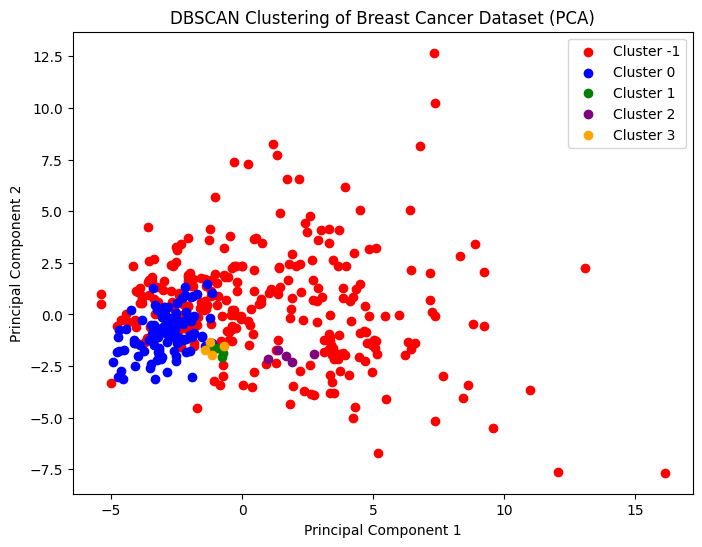

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA



# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

# Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
labels = dbscan.fit_predict(scaled_data)

# Visualize the results using PCA for dimensionality reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)

# Create a DataFrame for visualization
wbcd = pd.DataFrame(data=x_pca, columns=['Principal Component 1', 'Principal Component 2'])
wbcd['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown']
for cluster_label, color in zip(np.unique(labels), colors):
    cluster_points = wbcd[wbcd['Cluster'] == cluster_label]
    plt.scatter(cluster_points['Principal Component 1'], cluster_points['Principal Component 2'], color=color, label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering of Breast Cancer Dataset (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Parzen Windows

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.metrics import accuracy_score, classification_report



# Fit a Parzen Windows (Kernel Density Estimation) model on the training data
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(X_train)

# Evaluate the model on the test set
log_densities = kde.score_samples(X_test)

# Convert log-densities to probabilities
probabilities = np.exp(log_densities)

# Set a threshold for classifying as malignant or benign (you may need to adjust this threshold)
threshold = 0.5
predictions = (probabilities > threshold).astype(int)

# Evaluate the predictions
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)


Accuracy: 0.63

Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       108
           1       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KernelDensity was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Hierarchical Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


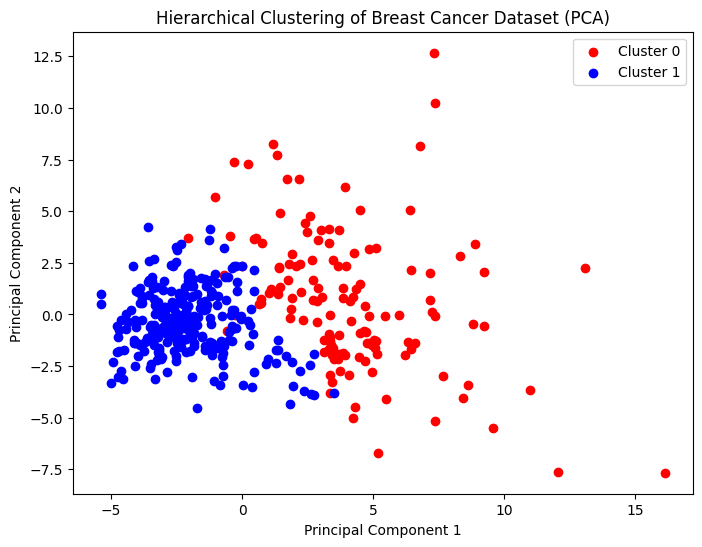

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA



# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

# Apply hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(scaled_data)

# Visualize the results using PCA for dimensionality reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)

# Create a DataFrame for visualization
wbcd = pd.DataFrame(data=x_pca, columns=['Principal Component 1', 'Principal Component 2'])
wbcd['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for cluster_label, color in zip(np.unique(cluster_labels), colors):
    cluster_points = wbcd[wbcd['Cluster'] == cluster_label]
    plt.scatter(cluster_points['Principal Component 1'], cluster_points['Principal Component 2'], color=color, label=f'Cluster {cluster_label}')

plt.title('Hierarchical Clustering of Breast Cancer Dataset (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
